In [48]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

NUM_SUPPORT_POINTS = 3
NUM_QUERY_POINTS = 5

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
from OmniglotGenerator import OmniglotGenerator

omniglot = OmniglotGenerator(data_dir='/home/jason/datasets/omniglot_images', max_iter=100, num_classes_per_ep=60, \
                             num_support_points_per_class=NUM_SUPPORT_POINTS, num_query_points_per_class=NUM_QUERY_POINTS)

print 'train_classes:', omniglot.train_classes[0:6]
print 'test_classes:', omniglot.test_classes[0:6]

('train class dirs:', (1200,))
('test class dirs:', (423,))
('train_classes:', (4800, 2))
('test classes:', (1692, 2))
train_classes: [['0.0' '/home/jason/datasets/omniglot_images/0449']
 ['90.0' '/home/jason/datasets/omniglot_images/0449']
 ['180.0' '/home/jason/datasets/omniglot_images/0449']
 ['270.0' '/home/jason/datasets/omniglot_images/0449']
 ['0.0' '/home/jason/datasets/omniglot_images/1489']
 ['90.0' '/home/jason/datasets/omniglot_images/1489']]
test_classes: [['0.0' '/home/jason/datasets/omniglot_images/0003']
 ['90.0' '/home/jason/datasets/omniglot_images/0003']
 ['180.0' '/home/jason/datasets/omniglot_images/0003']
 ['270.0' '/home/jason/datasets/omniglot_images/0003']
 ['0.0' '/home/jason/datasets/omniglot_images/0012']
 ['90.0' '/home/jason/datasets/omniglot_images/0012']]


In [50]:
# check that the splits are disjoint
train_class_dirs = set(omniglot.train_classes[:, 1])
test_class_dirs = set(omniglot.test_classes[:, 1])
assert len(train_class_dirs.intersection(test_class_dirs)) == 0

In [51]:
# sample data
(support_labels, support_points, support_names), (query_labels, query_points, query_names) = omniglot.next()
print 'support labels:', support_labels[0:10]
print 'support names:', support_names[0:10]
print 'query labels:', query_labels[0:10]
print 'query names:', query_names[0:10]

# check that all the support and query points are from the same classes
support_classes = set(support_labels)
query_classes = set(query_labels)
assert support_classes == query_classes

# check that the support and query classes are drawn from the training classes
support_class_names = set([(r, f[0:-7]) for (r, f) in support_names])
query_class_names   = set([(r, f[0:-7]) for (r, f) in query_names])
assert [scn in omniglot.train_classes for scn in support_class_names] == [True] * len(support_class_names)
assert [qcn in omniglot.train_classes for qcn in query_class_names] == [True] * len(query_class_names)

# check that number of support points per class and number of query points per class are correct
support_points_per_class = {k : 0 for k in support_classes}
query_points_per_class = {k : 0 for k in query_classes}

for sl in support_labels:
    support_points_per_class[sl] += 1
for ql in query_labels:
    query_points_per_class[ql] += 1

for l in support_classes:
    assert support_points_per_class[l] == NUM_SUPPORT_POINTS
    assert query_points_per_class[l] == NUM_QUERY_POINTS

support labels: [ 13.  42.  46.  53.  29.  52.  42.  27.  33.  23.]
support names: [['180.0' '/home/jason/datasets/omniglot_images/1504/13.png']
 ['180.0' '/home/jason/datasets/omniglot_images/1162/18.png']
 ['180.0' '/home/jason/datasets/omniglot_images/0771/15.png']
 ['180.0' '/home/jason/datasets/omniglot_images/0459/04.png']
 ['0.0' '/home/jason/datasets/omniglot_images/1110/01.png']
 ['270.0' '/home/jason/datasets/omniglot_images/1380/06.png']
 ['180.0' '/home/jason/datasets/omniglot_images/1162/01.png']
 ['0.0' '/home/jason/datasets/omniglot_images/1573/07.png']
 ['270.0' '/home/jason/datasets/omniglot_images/1461/12.png']
 ['90.0' '/home/jason/datasets/omniglot_images/0564/04.png']]
query labels: [  0.  45.  23.  18.  24.  20.  51.  45.  34.  19.]
query names: [['0.0' '/home/jason/datasets/omniglot_images/0190/16.png']
 ['90.0' '/home/jason/datasets/omniglot_images/0466/02.png']
 ['90.0' '/home/jason/datasets/omniglot_images/0564/03.png']
 ['90.0' '/home/jason/datasets/omniglot_

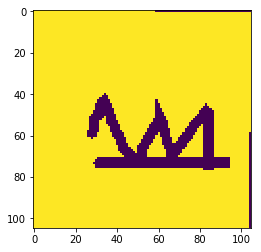

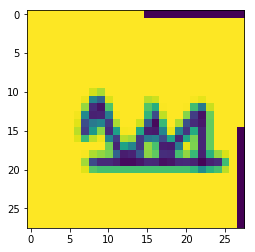

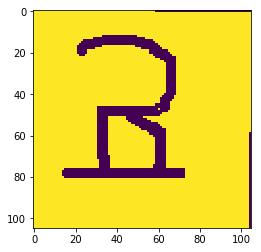

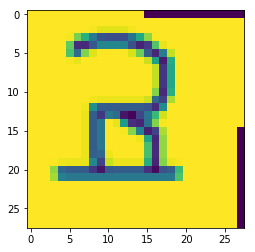

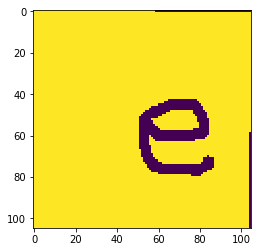

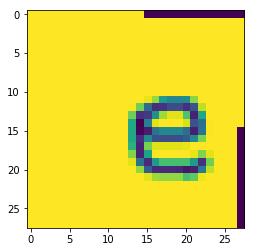

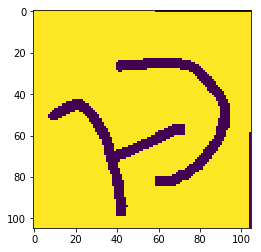

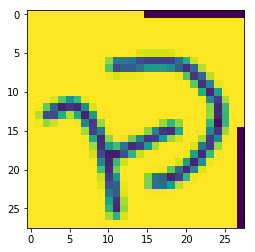

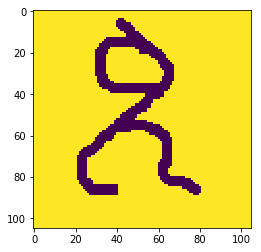

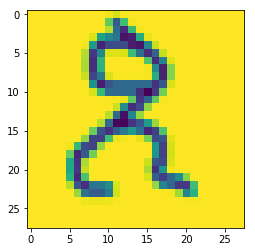

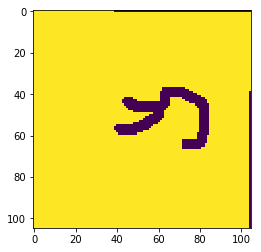

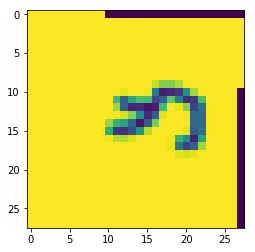

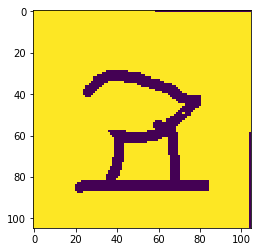

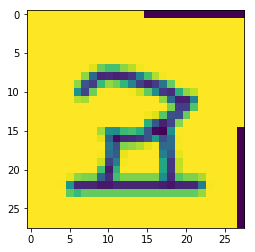

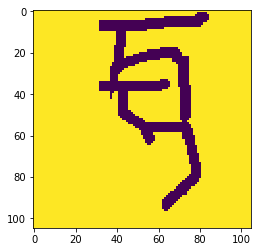

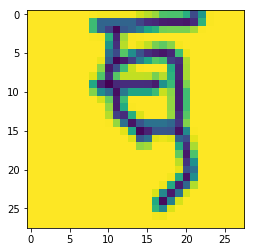

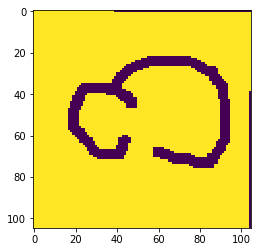

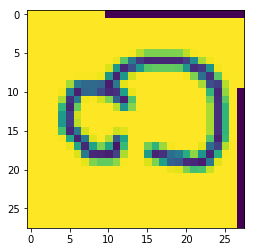

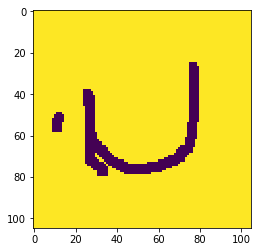

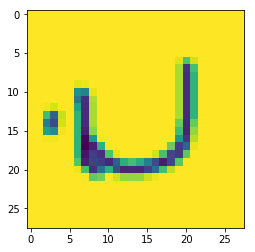

In [67]:
from scipy.misc import imread, imresize
from scipy.ndimage import rotate

# check that the images match the support name files
for ((r, f), i) in zip(support_names[0:10], support_points[0:10]):
    # visualize both images
    gt = imread(f)
    gt = rotate(gt, float(r))
    plt.imshow(gt)
    plt.show()
    plt.imshow(i[:, :, 0])
    plt.show()